# Packages

In [51]:
'''# Installer les packages principaux
!pip install ydata-profiling 
!pip install missingno
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install yellowbrick'''

'# Installer les packages principaux\n!pip install ydata-profiling \n!pip install missingno\n!pip install matplotlib\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install yellowbrick'

In [52]:
'''from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot'''


'from pathlib import Path\n\nimport matplotlib.pyplot as plt\nimport missingno as msno\nimport numpy as np\nimport pandas as pd\nimport plotly.express as px\nimport plotly.graph_objs as go\nimport seaborn as sns\nfrom plotly.subplots import make_subplots\nfrom ydata_profiling import ProfileReport\nfrom yellowbrick.regressor import ResidualsPlot'

In [53]:
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd()

# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "data")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: C:\Users\AFRICA TECH\Desktop\ENSAE2024-2025\Semestre 1\UE statistique\Machine leaning 1\Tp 
Data directory: C:\Users\AFRICA TECH\Desktop\ENSAE2024-2025\Semestre 1\UE statistique\Machine leaning 1\Tp\data


In [54]:
# you must put the CSV file billets.csv in data directory, cf above cell
data = pd.read_csv(Path(DATA_DIR, "billets.csv"), sep=";")
data.shape  # data frame dimensions (nb rows, nb columns)

(1500, 7)

In [55]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

In [56]:
# suppression des NA pour la variable cible "margin_low"
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [57]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [58]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [59]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

# Train / Test split

In [60]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


# Standardisation

In [61]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Exercice:
Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test

# Analyse des variables explicatives entre les jeux de train et de test

## Etape 1: Comparaison des moyennes et Variances

In [62]:
train_mean = X_train_std.mean()
train_var = X_train_std.var()
test_mean = X_test_std.mean()
test_var = X_test_std.var()

print("Moyenne - Train:\n", train_mean)
print("Variance - Train:\n", train_var)
print("Moyenne - Test:\n", test_mean)
print("Variance _ Test:\n", test_var)

Moyenne - Train:
 -2.169514567995634e-14
Variance - Train:
 1.0
Moyenne - Test:
 -0.029367556575920006
Variance _ Test:
 1.0096086744445747


La moyenne des données d'entraînement est très proche de zéro, ce qui est attendu après une normalisation. La moyenne du jeu de test est légèrement décalée, mais reste également proche de zéro, indiquant une normalisation réussie.
La variance pour les deux ensembles est autour de 1, ce qui est également conforme à une normalisation standard. Cela signifie que les deux jeux de données sont comparables en termes d'échelle.

## Etape 2:  Minima, Maxima

In [63]:
train_min = X_train_std.min()
train_max = X_train_std.max()
test_min = X_test_std.min()
test_max = X_test_std.max()

print("Minima- Train:\n", train_min)
print("Maxima- Train:\n", train_max)
print("Minima - Test:\n", test_min)
print("Maxima - Test:\n", test_max)

Minima- Train:
 -3.1005472329842623
Maxima- Train:
 3.261828731554815
Minima - Test:
 -3.8451626777345784
Maxima - Test:
 3.479489006301932


## # Etape 3 : Visualisation des Distributions

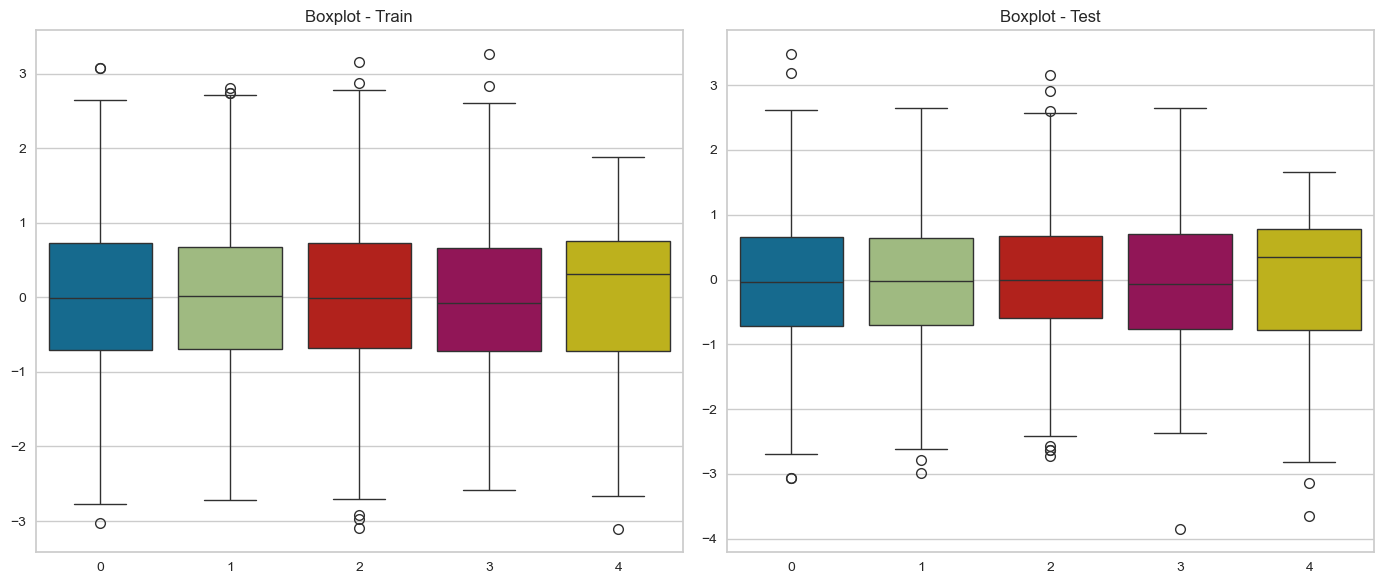

In [64]:
# Boxplots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_std).set_title("Boxplot - Train")
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_std).set_title("Boxplot - Test")
plt.tight_layout()
plt.show()

Les boxplots montrent que les deux ensembles de données partagent des distributions similaires pour chaque variable. Les médianes et les intervalles interquartiles sont relativement proches, bien que certains points extrêmes diffèrent légèrement entre les jeux de données d'entraînement et de test.

# Etape 4: Les distributions des variables cibles

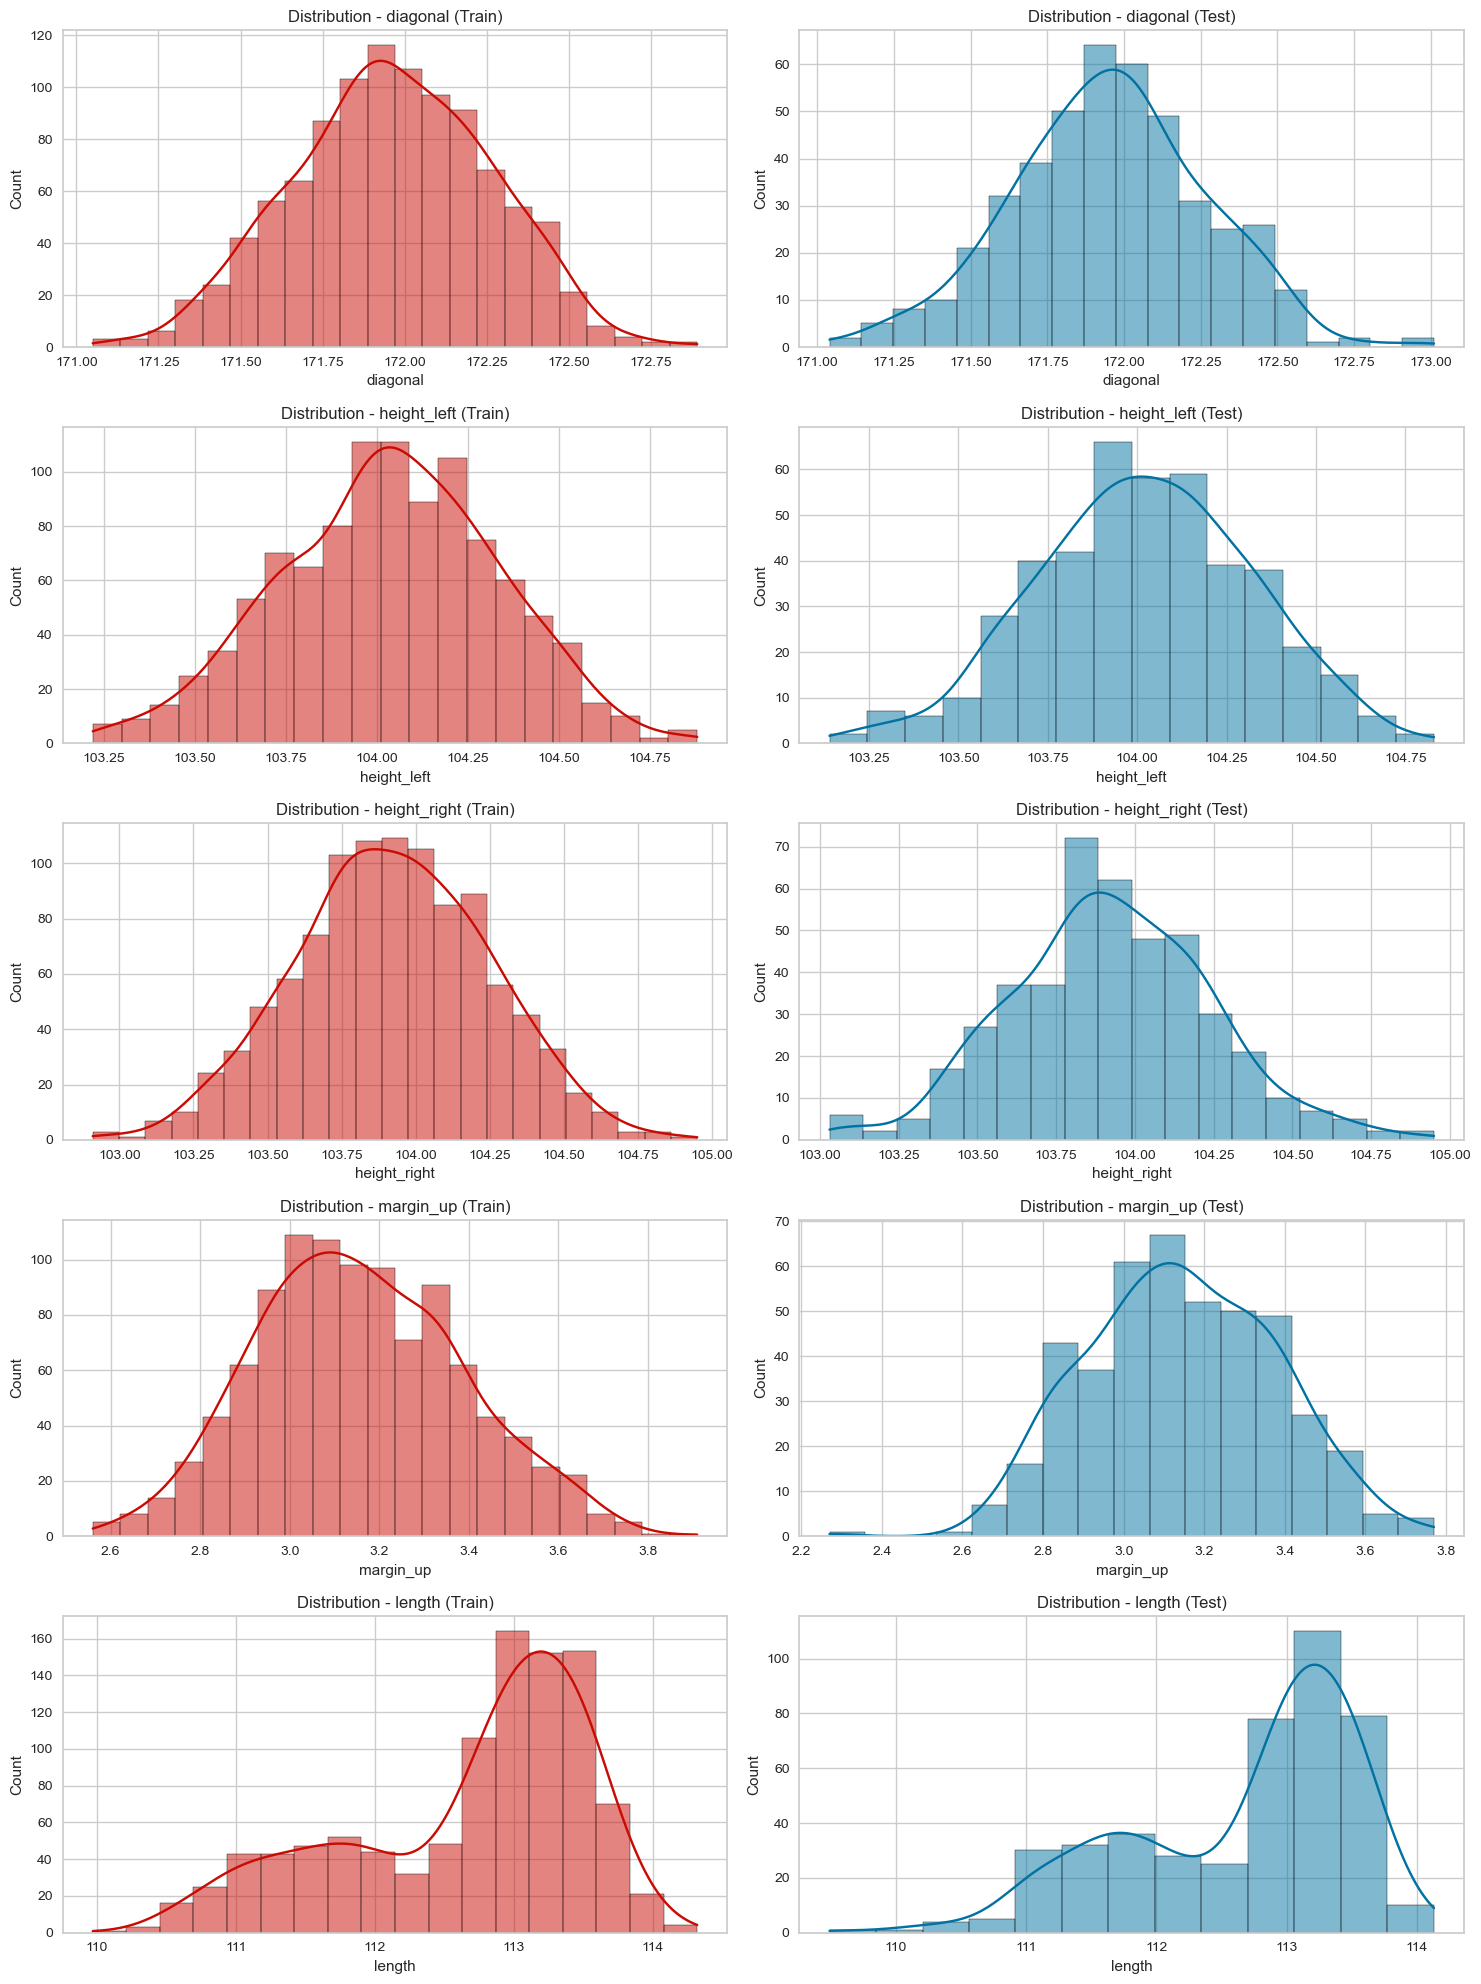

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables cibles - ajoutez ici toutes vos variables cibles
cible_variables = ["diagonal", "height_left", "height_right", "margin_up", "length"] 

# Créer des sous-graphiques pour chaque variable cible dans le jeu de données d'entraînement et de test
fig, axes = plt.subplots(nrows=len(cible_variables), ncols=2, figsize=(15, 4 * len(cible_variables)))

for i, var in enumerate(cible_variables):
    # Histogramme pour le jeu de train
    sns.histplot(X_train[var], color='r', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution - {var} (Train)')
    
    # Histogramme pour le jeu de test
    sns.histplot(X_test[var], color='b', kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution - {var} (Test)')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


# Étape 5 : Tests Statistiques (Kolmogorov-Smirnov)

In [69]:

ks_results = {}
for col in X_train_std_df.columns:
    ks_stat, p_value = ks_2samp(X_train_std_df[col], X_test_std_df[col])
    ks_results[col] = {'KS-Stat': ks_stat, 'P-Value': p_value}

ks_results_df = pd.DataFrame(ks_results).T
print("\nRésultats du test de Kolmogorov-Smirnov (Train vs Test):\n", ks_results_df)


Résultats du test de Kolmogorov-Smirnov (Train vs Test):
        KS-Stat   P-Value
Var1  0.039165  0.714846
Var2  0.044450  0.559030
Var3  0.036878  0.779952
Var4  0.040003  0.689197
Var5  0.035621  0.813555


Le test de Kolmogorov-Smirnov a été effectué pour comparer chaque variable entre les jeux d'entraînement et de test. Les valeurs de 
p-value élevées pour chaque variable (supérieures à 0,05) suggèrent qu'il n'y a pas de différence statistiquement significative entre
les distributions des variables dans les jeux d'entraînement et de test.


# Etape 6: Correlation

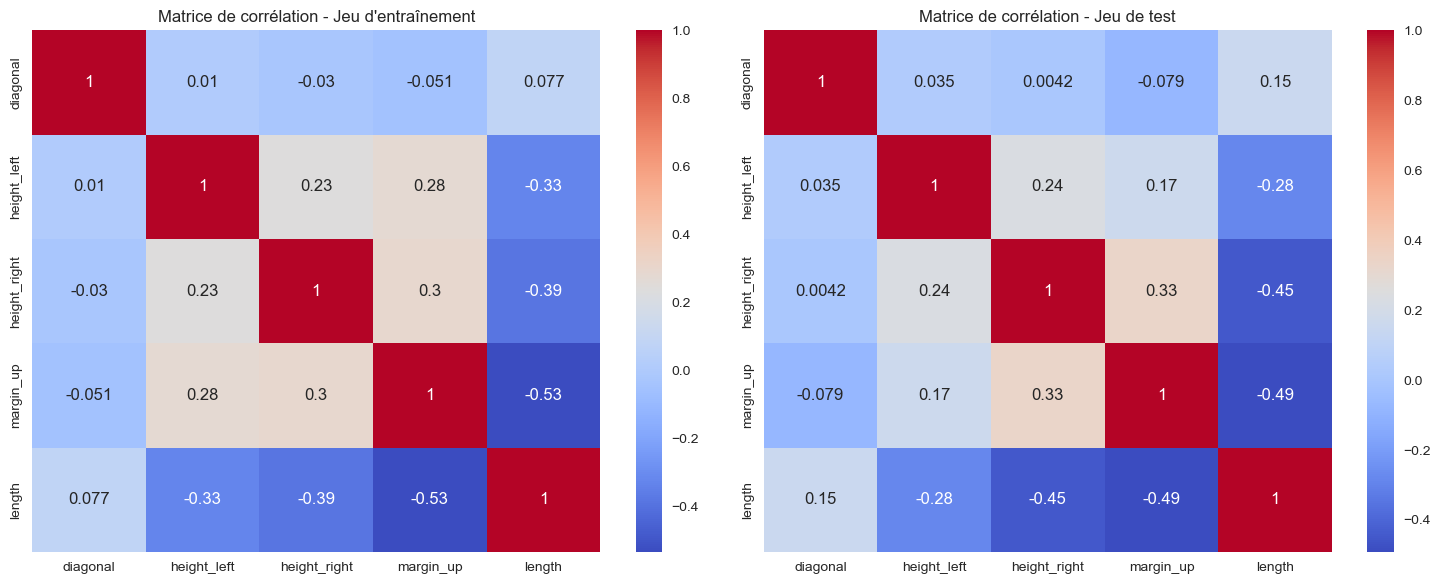

In [67]:
# Calcul de la matrice de corrélation pour le jeu de données d'entraînement
train_corr = X_train.corr()

# Calcul de la matrice de corrélation pour le jeu de données de test
test_corr = X_test.corr()

# Affichage des matrices de corrélation sous forme de cartes thermiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Carte thermique pour le jeu d'entraînement
sns.heatmap(train_corr, annot=True, cmap='coolwarm', ax=axes[0], cbar=True)
axes[0].set_title("Matrice de corrélation - Jeu d'entraînement")

# Carte thermique pour le jeu de test
sns.heatmap(test_corr, annot=True, cmap='coolwarm', ax=axes[1], cbar=True)
axes[1].set_title("Matrice de corrélation - Jeu de test")

plt.tight_layout()
plt.show()

Les matrices de corrélation pour les jeux d'entraînement et de test révèlent une structure de corrélation similaire, bien que certaines valeurs de corrélation diffèrent légèrement. Cela indique que les relations entre les variables explicatives sont cohérentes dans les deux ensembles, ce qui est positif pour la stabilité des performances du modèle.

Ces observations suggèrent que les jeux de données d'entraînement et de test sont bien équilibrés et représentatifs les uns des autres, 
ce qui est idéal pour la formation et la validation de modèles de machine learning.

####################################################################################################################################

# Exercice 2
Optimiser les modèles Ridge, Lasso et ElasticNet
- Etudier l'importance des variables dans chaque modèle

# 1 Ridge Regression

In [72]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error


In [73]:
# Initialisation du modèle Ridge
ridge = Ridge()

# Définition de la grille de paramètres pour alpha (valeurs allant de 10^-4 à 10^4)
ridge_params = {'alpha': np.logspace(-4, 4, 50)}

# GridSearchCV pour trouver le meilleur alpha avec validation croisée à 5 plis
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Affichage du meilleur alpha trouvé
print("Best Ridge alpha:", ridge_grid.best_params_)
ridge_best = ridge_grid.best_estimator_  # Modèle Ridge optimisé


Best Ridge alpha: {'alpha': 7.9060432109076855}


Alpha contrôle la force de la régularisation : des valeurs plus élevées pénalisent davantage les grands coefficients.
GridSearchC:  teste plusieurs valeurs d'alpha et sélectionne celle qui minimise l'erreur quadratique moyenne négativ
 (score ici maximisé, car c'est une erreur négative).

# 2 Lasso Regression

In [74]:
# Initialisation du modèle Lasso
lasso = Lasso()

# Définition de la grille de paramètres pour alpha (mêmes valeurs que pour Ridge)
lasso_params = {'alpha': np.logspace(-4, 4, 50)}

# GridSearchCV pour trouver le meilleur alpha avec validation croisée à 5 plis
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Affichage du meilleur alpha trouvé
print("Best Lasso alpha:", lasso_grid.best_params_)
lasso_best = lasso_grid.best_estimator_  # Modèle Lasso optimisé


Best Lasso alpha: {'alpha': 0.0001}


Comme pour Ridge, Lasso utilise un paramètre alpha pour contrôler la régularisation, mais avec la pénalisation L1 qui force certains 
coefficients à zéro, excluant certaines variables.

# 3 ElasticNet Regression

In [77]:
# Affichage des meilleurs paramètres trouvés
print("Best ElasticNet alpha and l1_ratio:", elastic_grid.best_params_)
elastic_best = elastic_grid.best_estimator_  # Modèle ElasticNet optimisé


Best ElasticNet alpha and l1_ratio: {'alpha': 0.013257113655901081, 'l1_ratio': 0.0}


l1_ratio contrôle le mélange entre la régularisation L1 (Lasso) et L2 (Ridge).
GridSearchCV recherche la meilleure combinaison d'alpha et l1_ratio pour minimiser l'erreur.

# Évaluation des modèles optimisés sur l'ensemble de test

In [78]:
# Création d'un dictionnaire pour stocker les meilleurs modèles
models = {'Ridge': ridge_best, 'Lasso': lasso_best, 'ElasticNet': elastic_best}

# Boucle pour évaluer chaque modèle
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Prédictions sur l'ensemble de test
    mse = mean_squared_error(y_test, y_pred)  # Calcul de l'erreur quadratique moyenne
    print(f"{model_name} Test MSE: {mse}")  # Affichage de l'erreur pour chaque modèle


Ridge Test MSE: 0.21612211393634526
Lasso Test MSE: 0.21624485583494807
ElasticNet Test MSE: 0.21616143610658184


Nous calculons l'erreur quadratique moyenne (MSE) pour chaque modèle sur l'ensemble de test afin de comparer leur performance.
Les modèles ayant une MSE plus faible (Ridge) sont considérés comme plus performants.

# Importance des variables dans chaque modèle

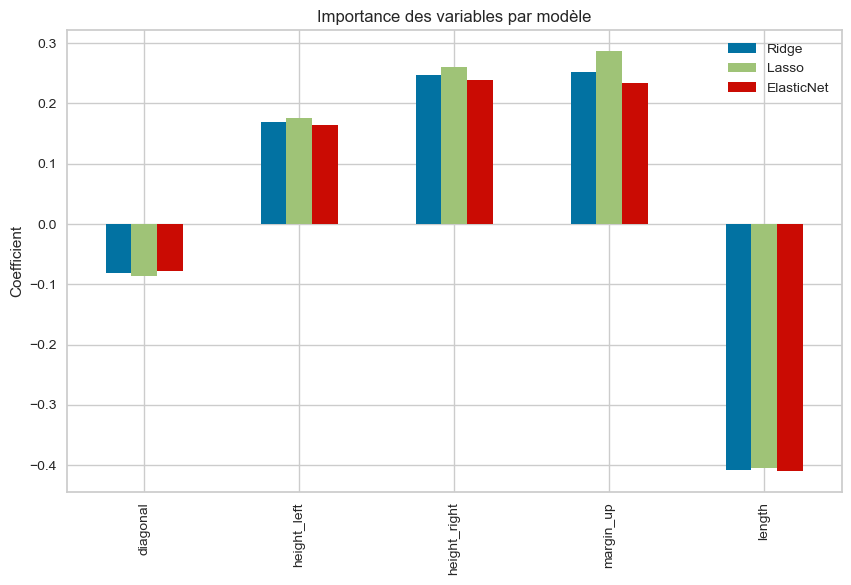

In [79]:
# Création d'un DataFrame pour stocker les coefficients des variables pour chaque modèle
coef_df = pd.DataFrame(index=X.columns)

# Boucle pour ajouter les coefficients de chaque modèle au DataFrame
for model_name, model in models.items():
    coef_df[model_name] = model.coef_

# Visualisation des coefficients sous forme de graphique en barres
coef_df.plot(kind='bar', figsize=(10, 6))
plt.title('Importance des variables par modèle')
plt.ylabel('Coefficient')
plt.show()


En affichant un graphique en barres, nous visualisons l'importance des variables. Les variables avec des coefficients plus élevés ont plus d'impact sur le modèle.